  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000      

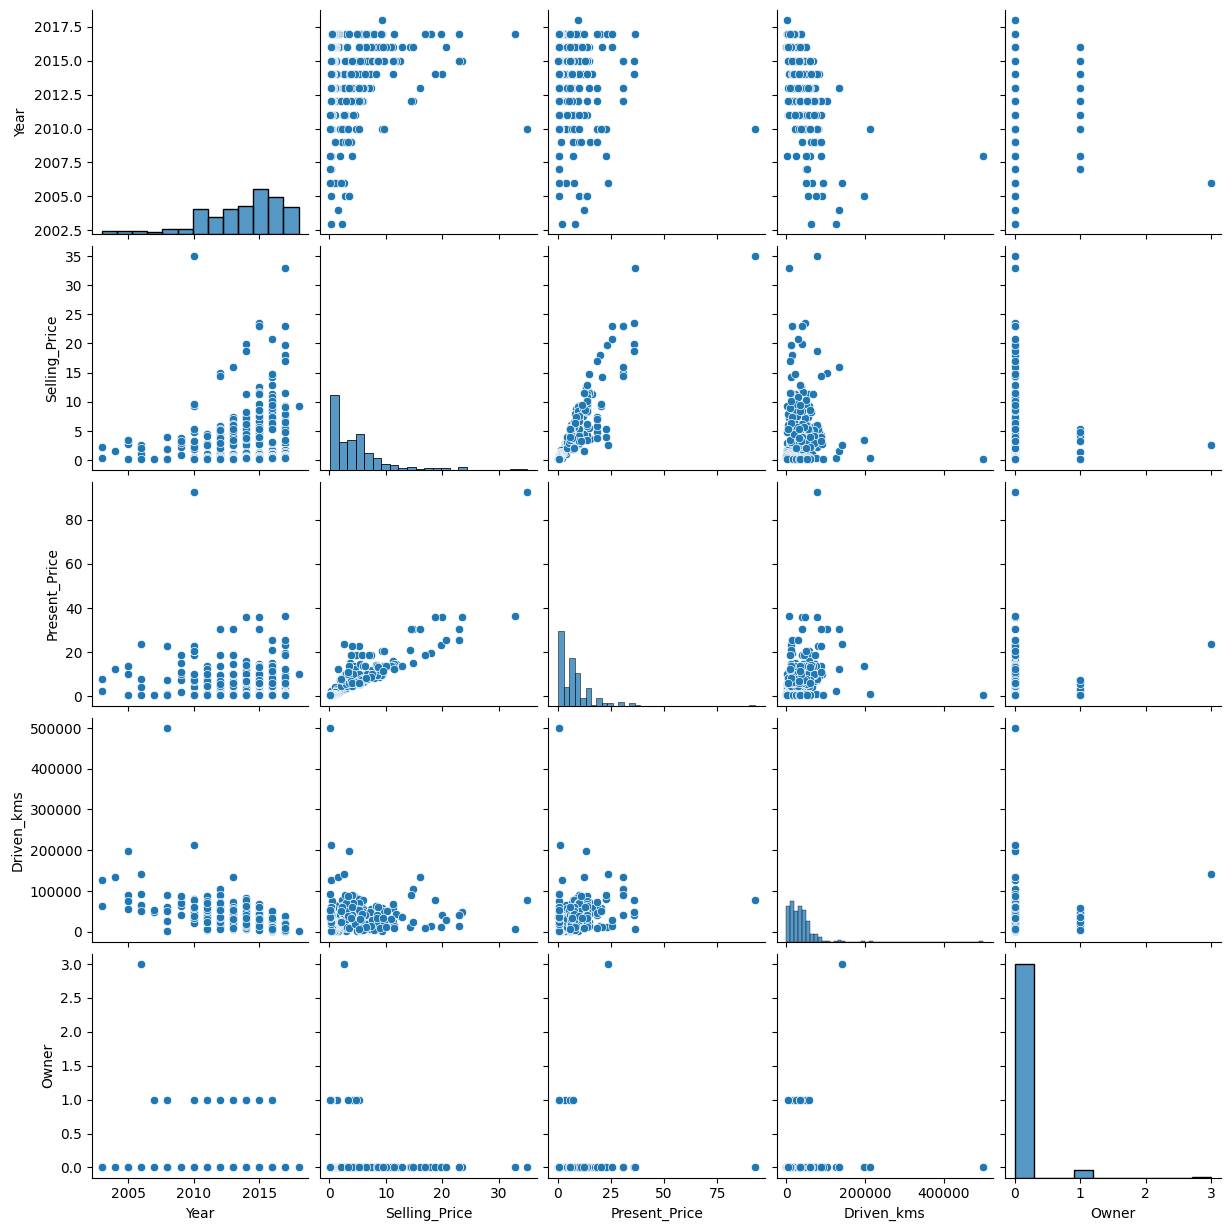

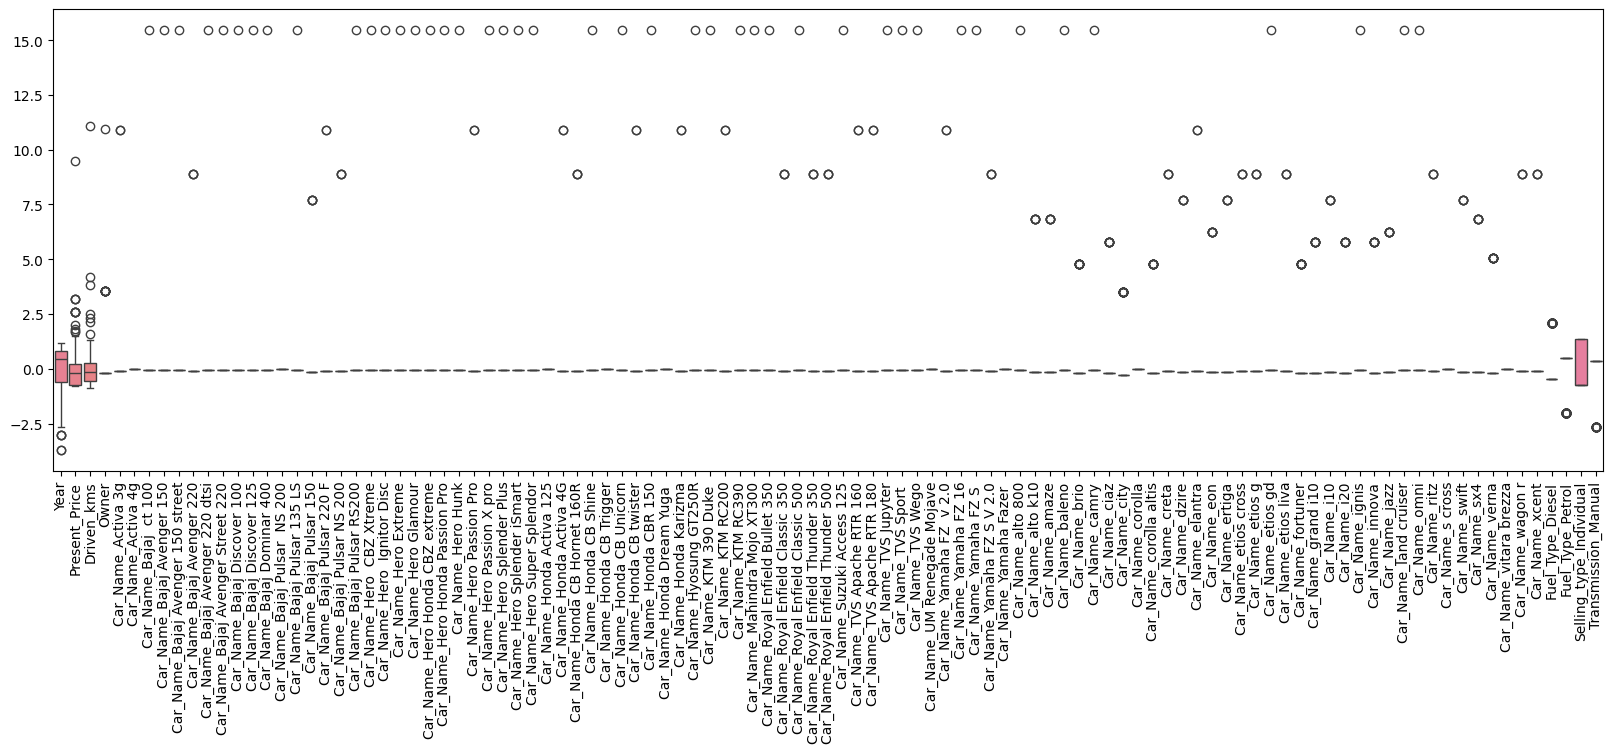

Train MSE: 1.3358
Test MSE: 6.845639047948194e+23
Train R^2: 0.9495
Test R^2: -2.9717670250209654e+22


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\\Users\\bhavy\\Downloads\\car data (2).csv")

print(df.head(), end="\n\n\n")
print(df.describe())

sns.pairplot(df)
plt.show()

df.dropna(inplace=True)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)
X = df.drop('Selling_Price', axis=1)
Y = df['Selling_Price']

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Visualize scaled features
plt.figure(figsize=(20, 6))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X_train.columns))
plt.xticks(rotation=90)
plt.show()
model = LinearRegression()
model.fit(X_train_scaled, Y_train)
# Predictions on training and testing set
train_preds = model.predict(X_train_scaled)
test_preds = model.predict(X_test_scaled)

# Evaluating the model
print('Train MSE:', mean_squared_error(Y_train, train_preds))
print('Test MSE:', mean_squared_error(Y_test, test_preds))
print('Train R^2:', r2_score(Y_train, train_preds))
print('Test R^2:', r2_score(Y_test, test_preds))